# Broker Dealer Series

We will propose a relevant and exhaustive market risk analysis of a Broker Dealer LPL Financial Holdings Inc.

## 1. Import Libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import Series_Functions as sf
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

sns.set(rc={"figure.figsize":(15, 8)},style="whitegrid")
plt.rcParams['font.family'] = 'serif'

## 2. Download the Data

In [7]:
# This is the ticker we choose to analyze
ticker = 'RJF'
# We use the function get_data to get the data from Yahoo Finance
prices = sf.get_data(ticker)

We compute the returns using the function get_returns from Series_Functions package.

In [8]:
returns = sf.get_returns(prices)

In [9]:
returns.head()

Date
2007-01-04 00:00:00-05:00   -0.003906
2007-01-05 00:00:00-05:00   -0.012091
2007-01-08 00:00:00-05:00    0.005623
2007-01-09 00:00:00-05:00    0.014145
2007-01-10 00:00:00-05:00    0.010055
Name: Close, dtype: float64

We plot the returns for the Broker Dealer using the function plot_returns.

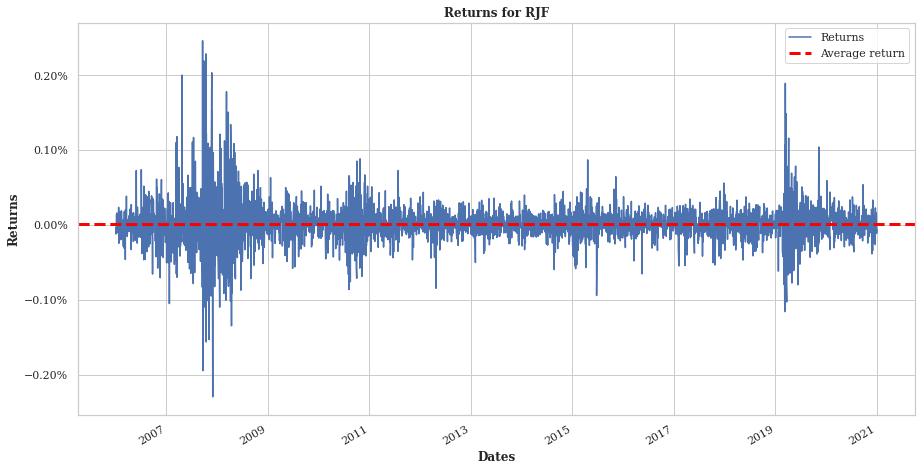

In [10]:
sf.plot_returns(returns, ticker)

## 3. Estimation of the VaR

### a. Non parametric method

We are computing the VaR using two methods, the first is a simple historical simulation method and the second is an age-weighted historical simulation. The difference between the two methods is the weight associate to the returns. In our case we associate these kind of weights:
$$
\omega_{i} = \frac{\lambda^{i-1}(1+\lambda)}{1+\lambda^{n}}
$$ 
for $i \in [1,n]$ where $n$ is the lenght of the period (The sum is equal to 1).

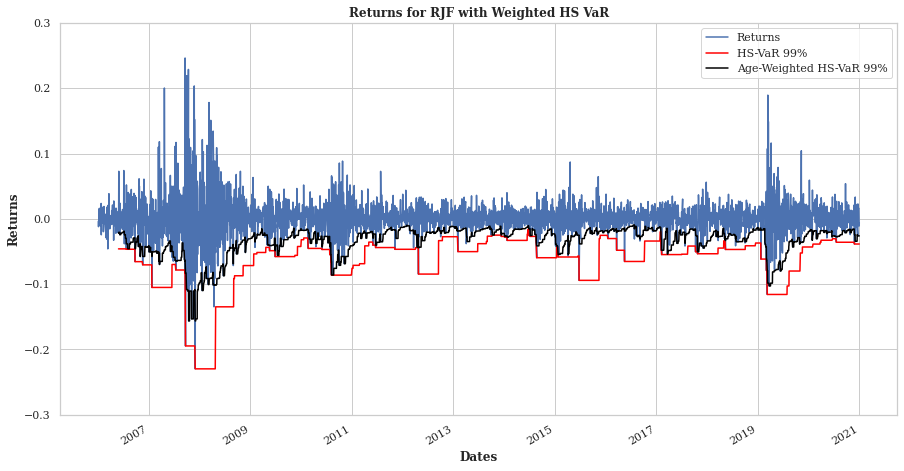

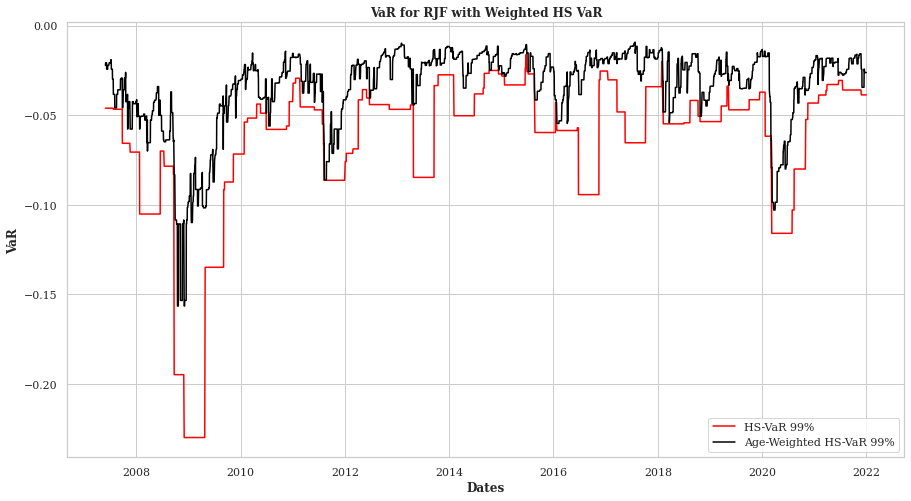

In [13]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=99,window=100,ticker=ticker)

If we are using a bigger window, the VaR will be more and more smoothed and constant.

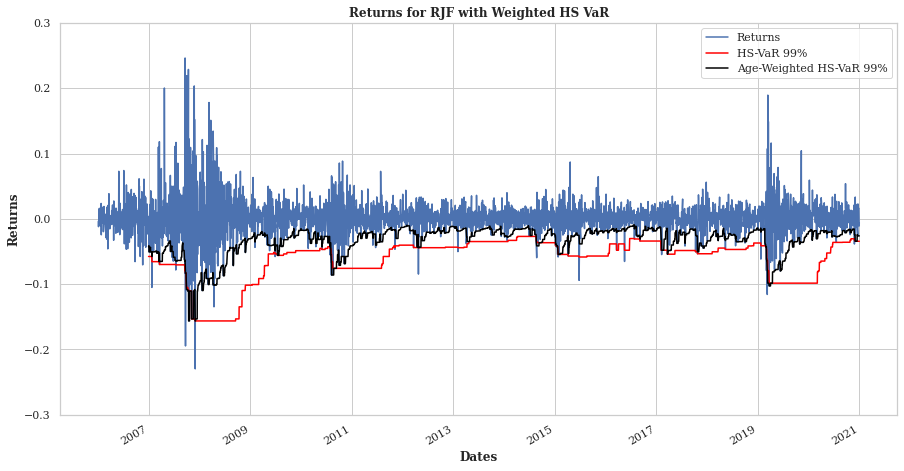

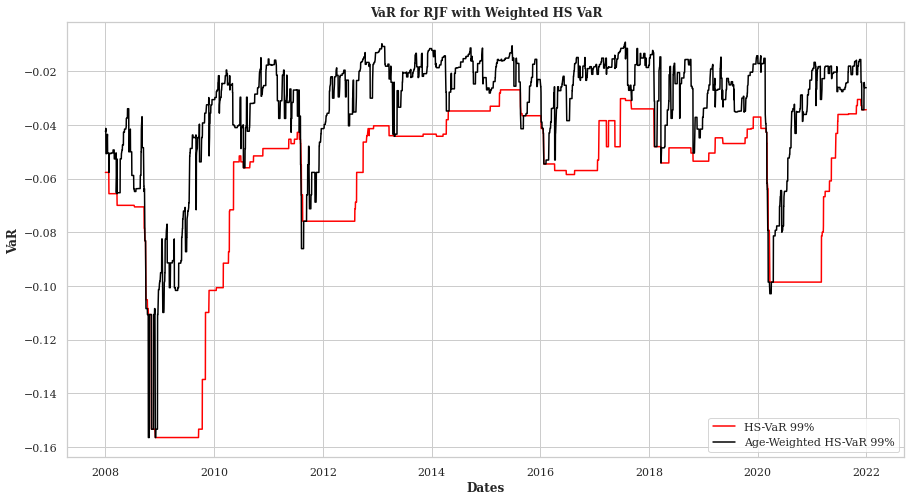

In [14]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=99,window=250,ticker=ticker)

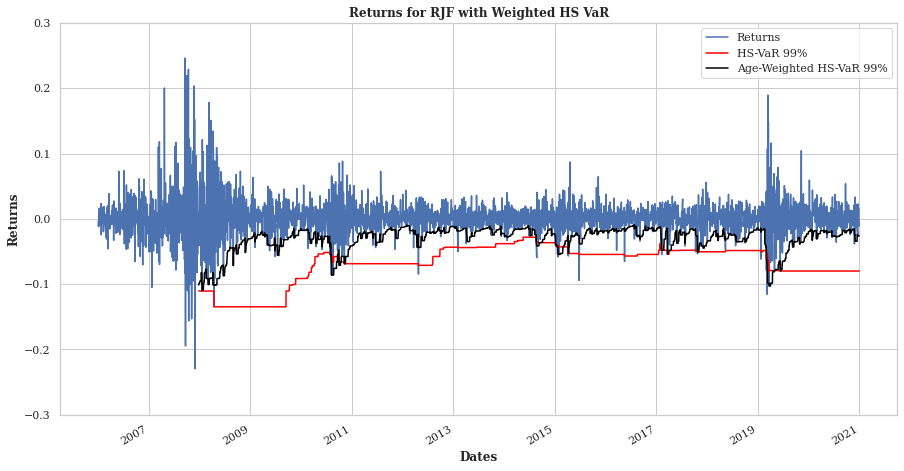

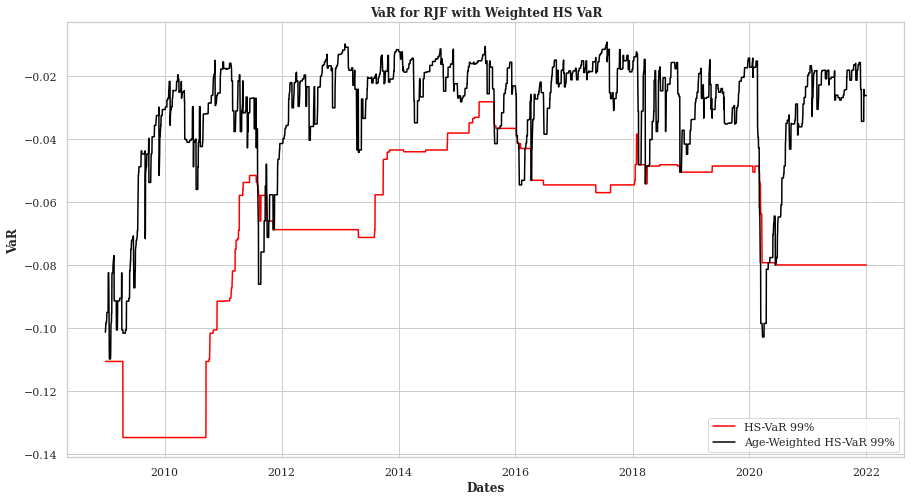

In [15]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=99,window=500,ticker=ticker)

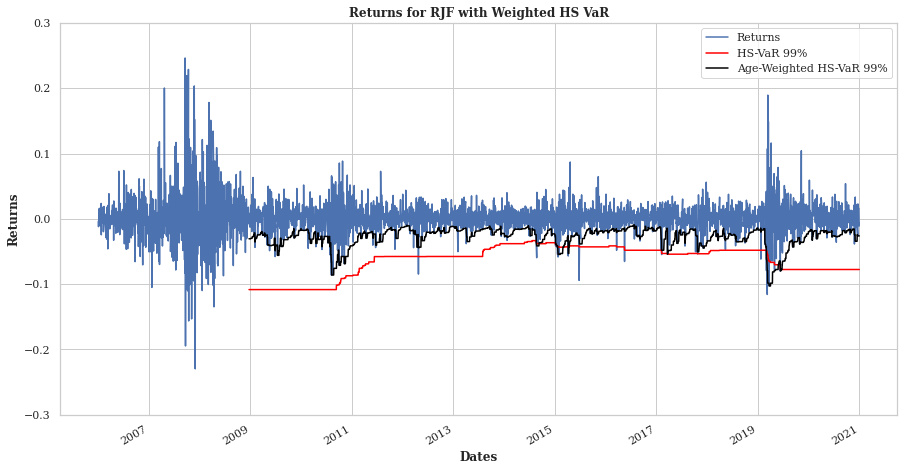

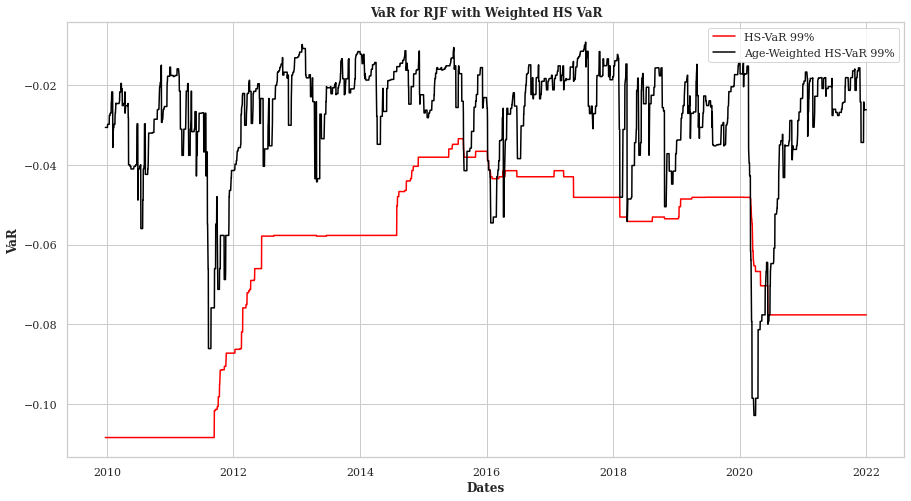

In [16]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=99,window=750,ticker=ticker)

### b. Parametric method

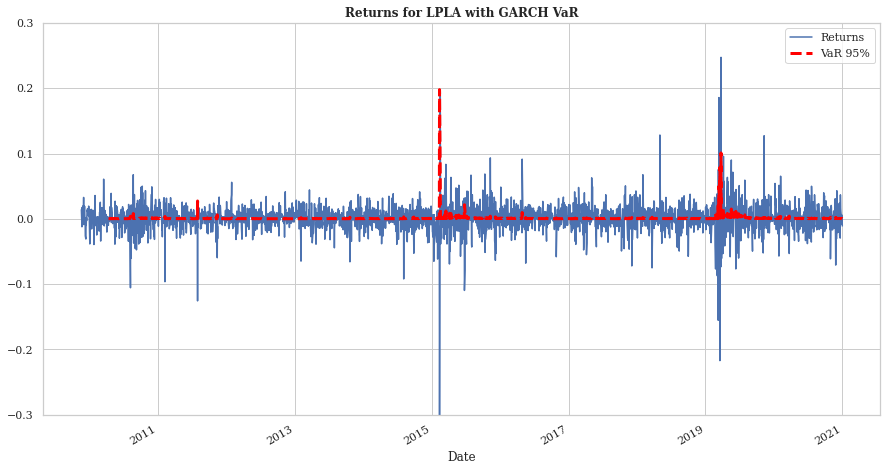

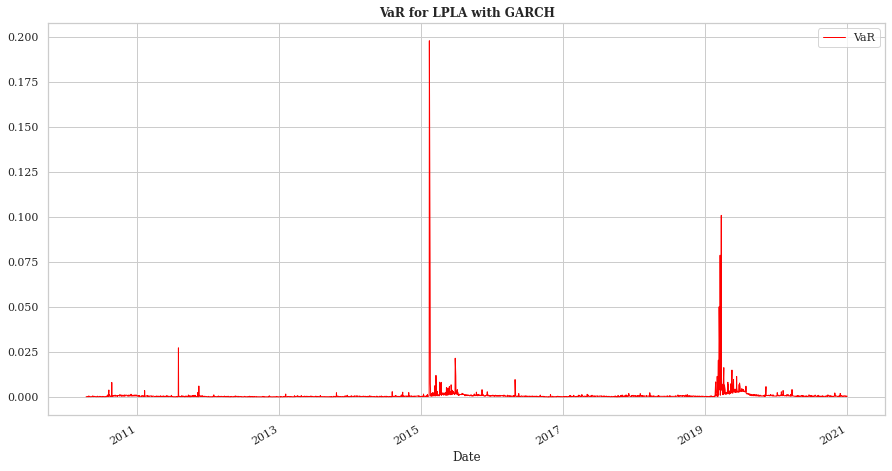

In [9]:
p,q = sf.optimize_garch(returns=returns, bounds=[9,9])
VaR_Param = sf.garch_var(returns=returns, confidence_level=95, p=p, q=q, ticker=ticker)

## Expected shortfall

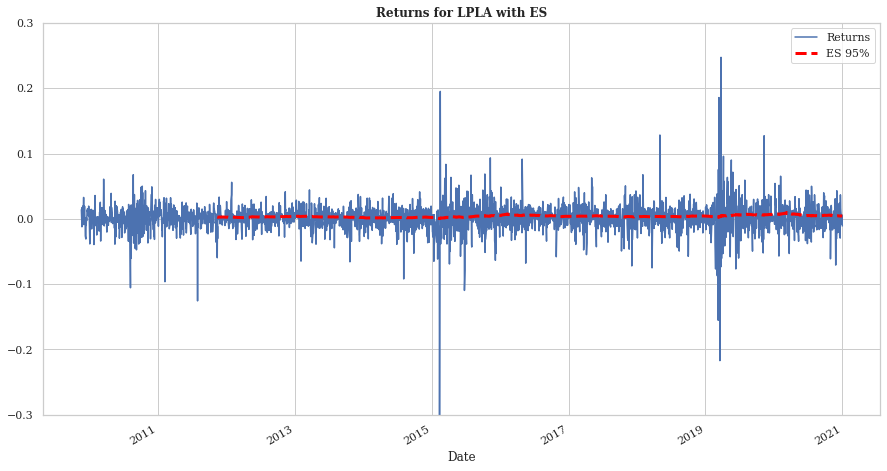

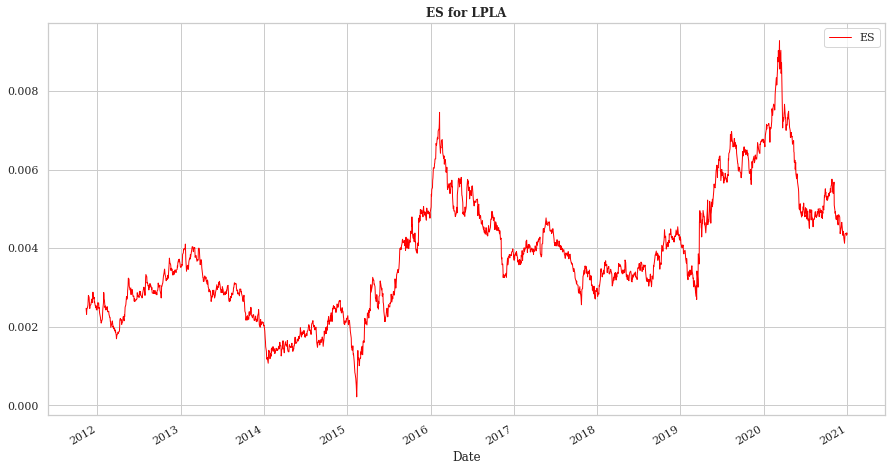

In [10]:
Es = sf.expected_shortfall(returns=returns, confidence_level=95, window=250, ticker=ticker)